In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
def load_specific_images(folder_path, suffix=None):
    images = []
    for filename in os.listdir(folder_path):
        if suffix is None or filename.endswith(suffix):  # Filter files if suffix is provided
            full_path = os.path.join(folder_path, filename)
            image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
            if image is not None:
                images.append(image)
            else:
                print(f"Failed to load image: {filename}")
    return images

In [ ]:
def generate_bounding_boxes(mask, min_area=230, y_range=(370, 730)):


    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bboxes = []
    for contour in contours:
        if cv2.contourArea(contour) >= min_area:  
            x, y, w, h = cv2.boundingRect(contour)  
            if y_range is None or (y_range[0] <= y <= y_range[1]):  
                bboxes.append((x, y, w, h))
    return bboxes


In [ ]:
def get_top_n_bounding_boxes(bboxes, n=5):
    # Sort by height (h) in descending order
    sorted_bboxes = sorted(bboxes, key=lambda box: box[3], reverse=True)
    return sorted_bboxes[:n]

In [ ]:
def plot_bounding_boxes(image, bboxes):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, cmap='gray')
    for (x, y, w, h) in bboxes:  # Iterate through bounding boxes
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.axis('off')
    plt.show()

Processing mask 1...
Number of detected objects: 2
Displaying top 2 longest bounding boxes.


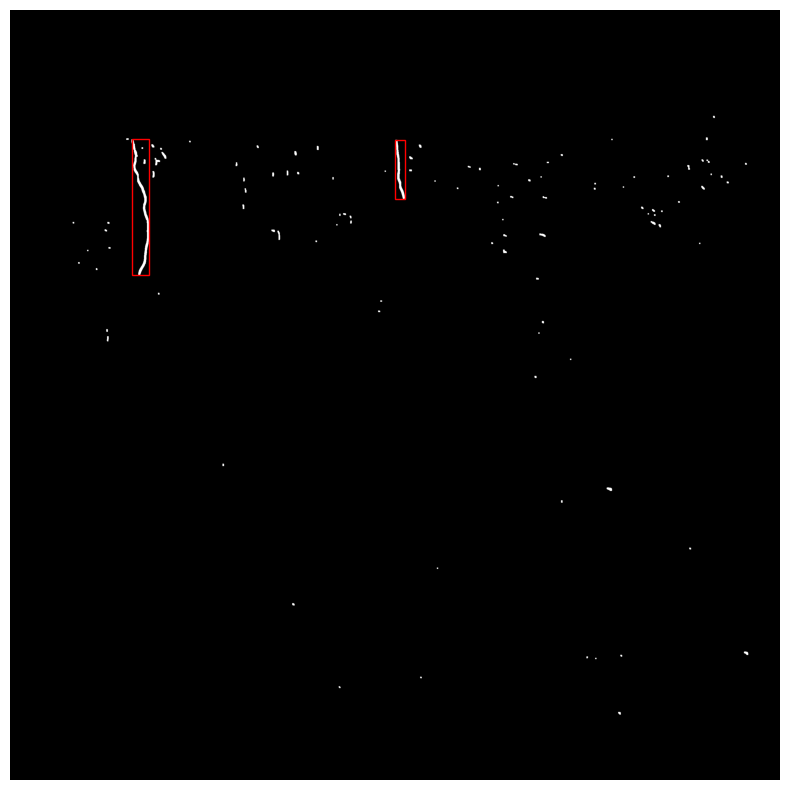

Processing mask 2...
Number of detected objects: 9
Displaying top 5 longest bounding boxes.


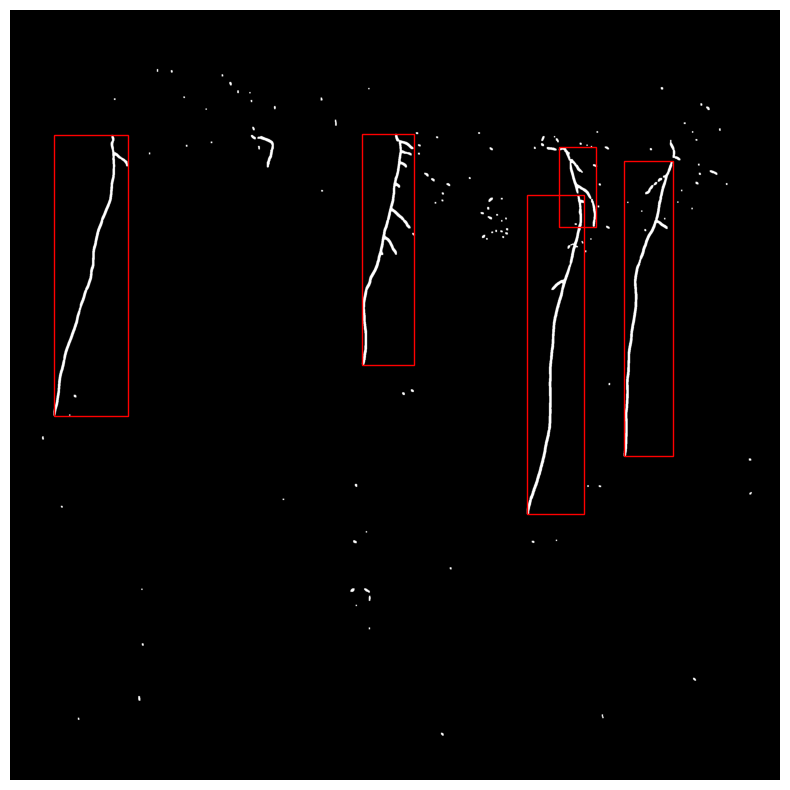

Processing mask 3...
Number of detected objects: 5
Displaying top 5 longest bounding boxes.


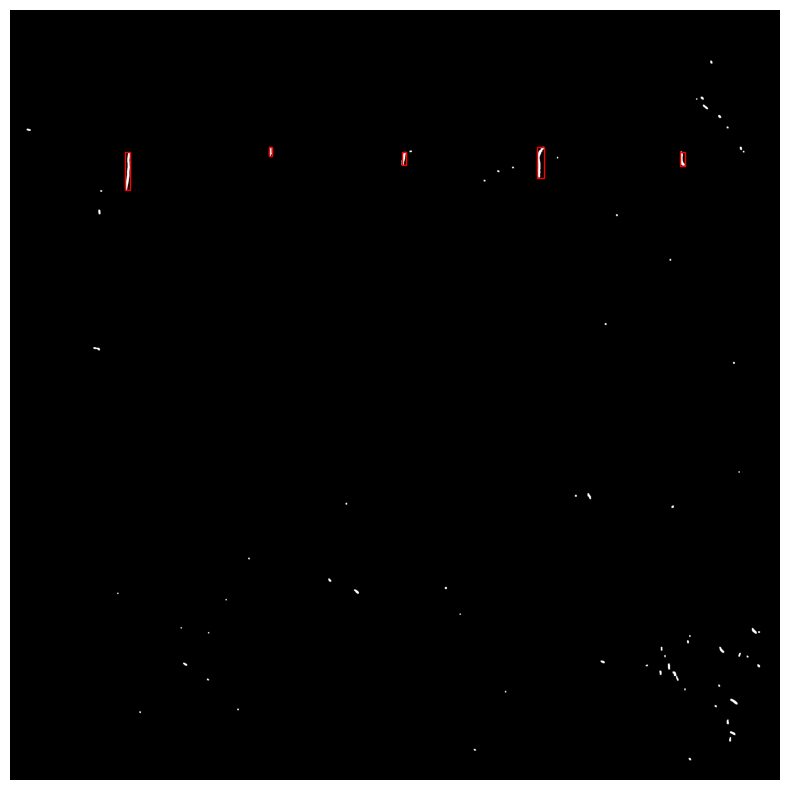

Processing mask 4...
Number of detected objects: 6
Displaying top 5 longest bounding boxes.


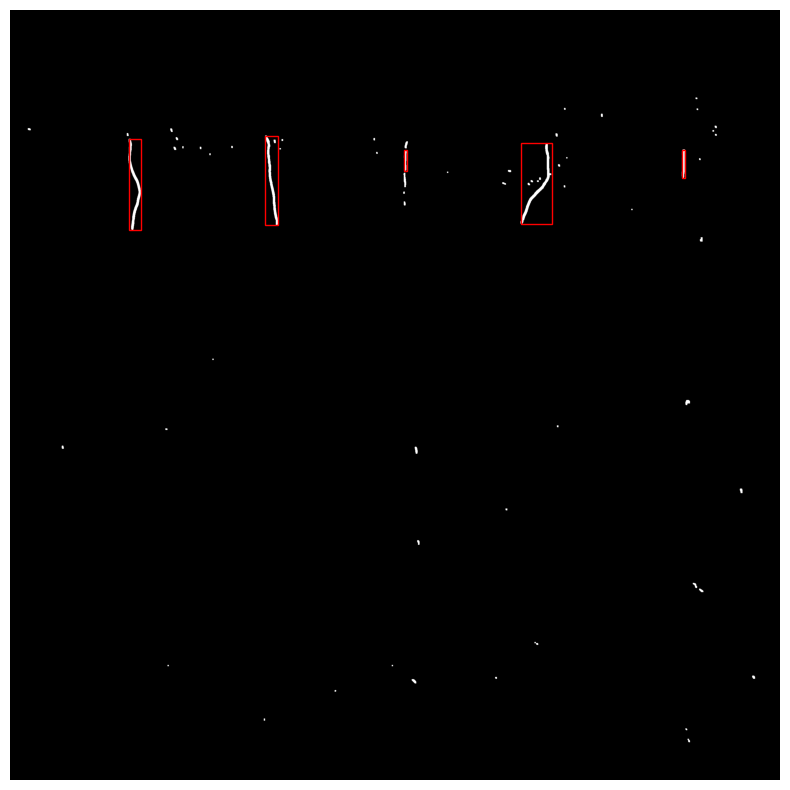

Processing mask 5...
Number of detected objects: 5
Displaying top 5 longest bounding boxes.


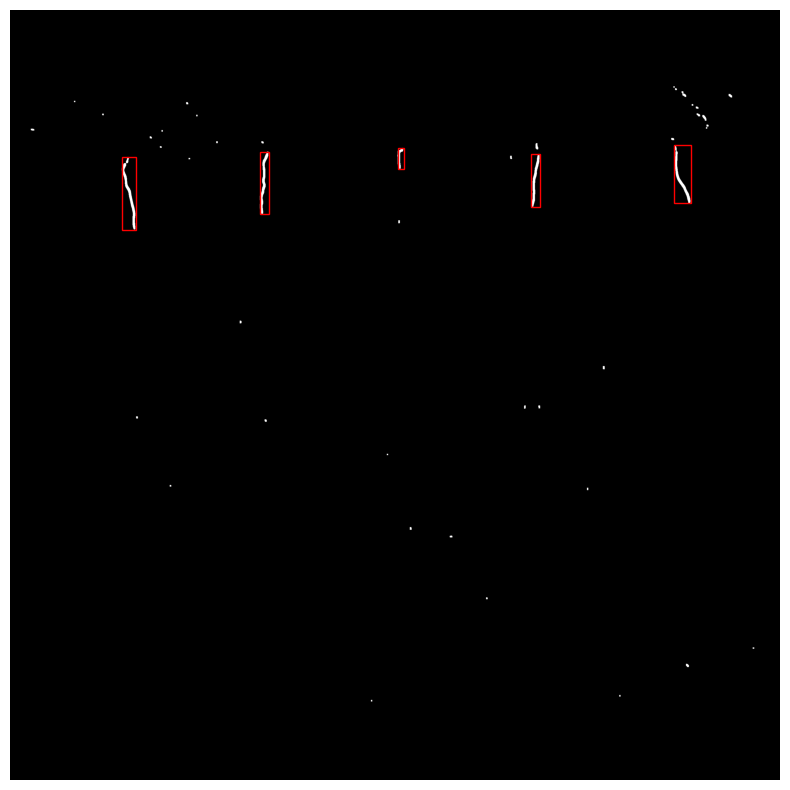

Processing mask 6...
Number of detected objects: 6
Displaying top 5 longest bounding boxes.


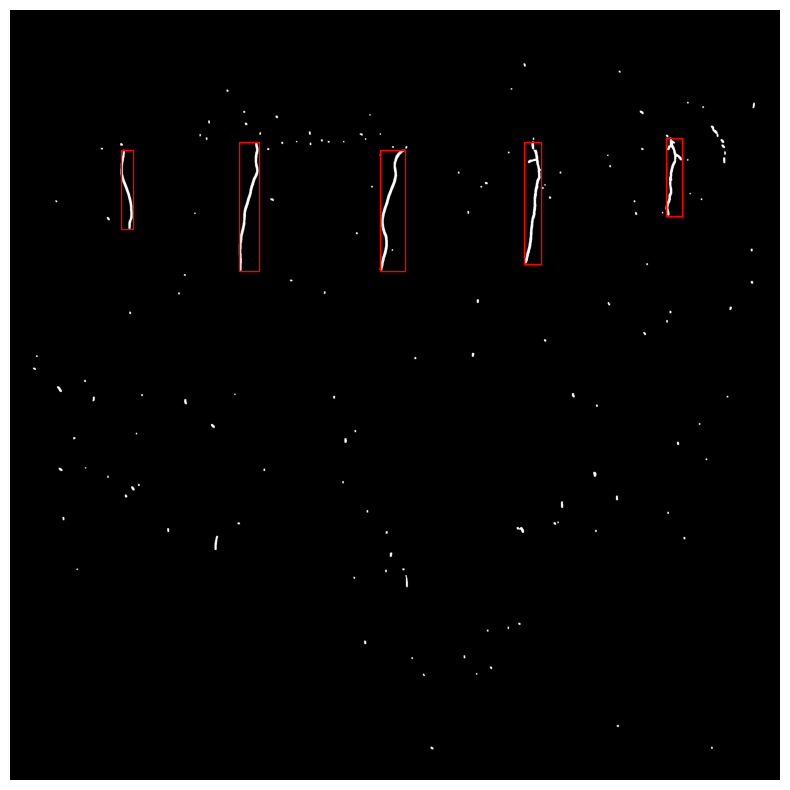

Processing mask 7...
Number of detected objects: 6
Displaying top 5 longest bounding boxes.


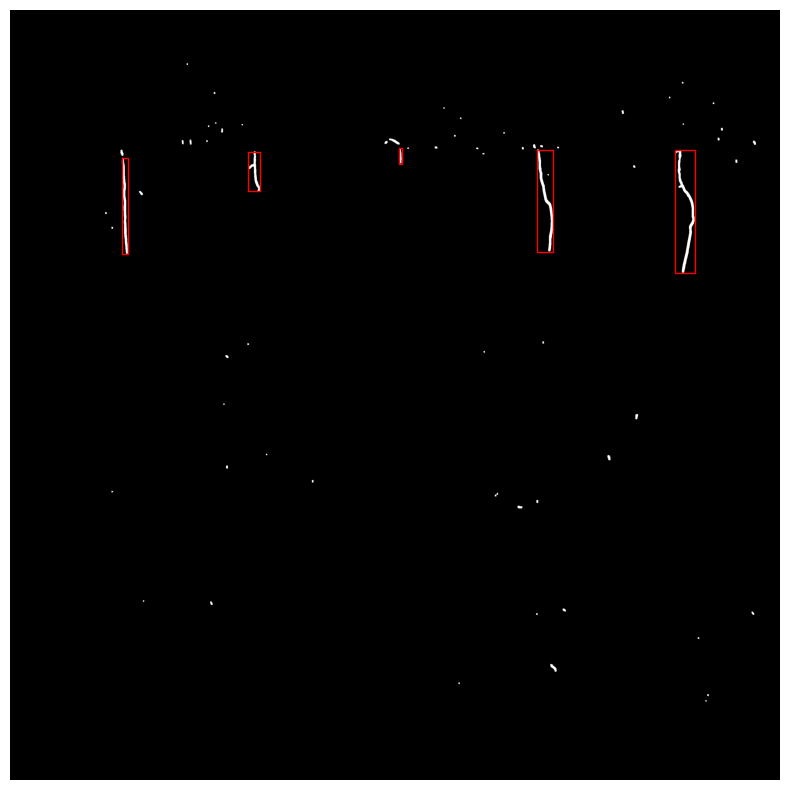

Processing mask 8...
Number of detected objects: 10
Displaying top 5 longest bounding boxes.


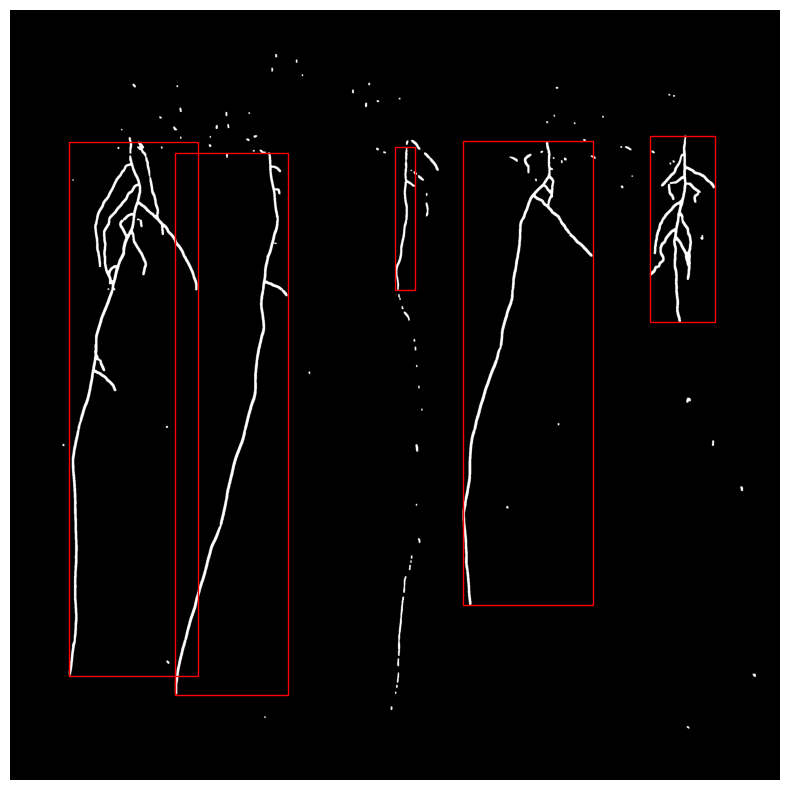

Processing mask 9...
Number of detected objects: 5
Displaying top 5 longest bounding boxes.


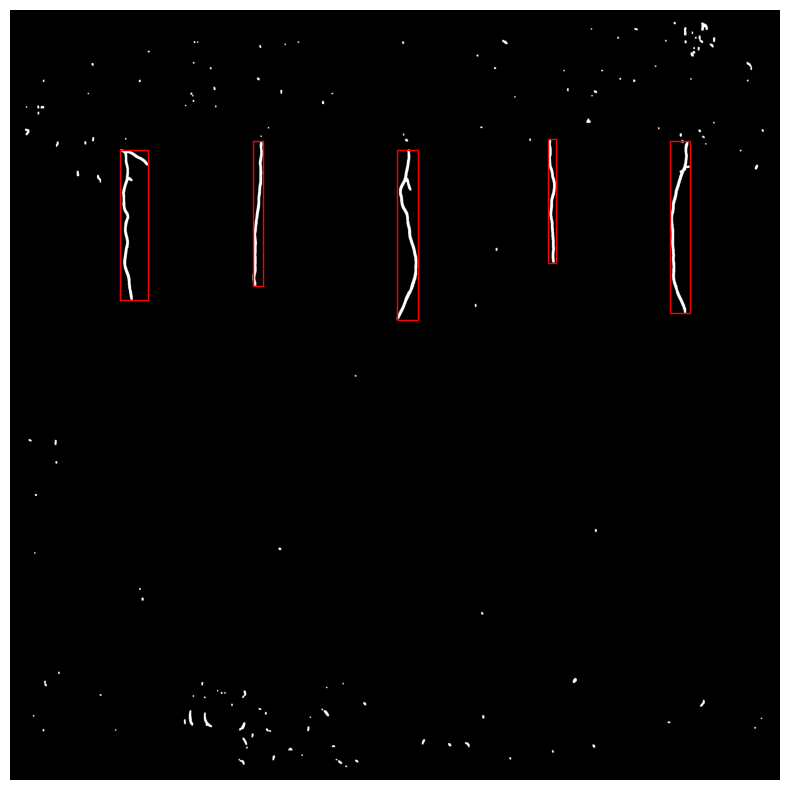

Processing mask 10...
Number of detected objects: 10
Displaying top 5 longest bounding boxes.


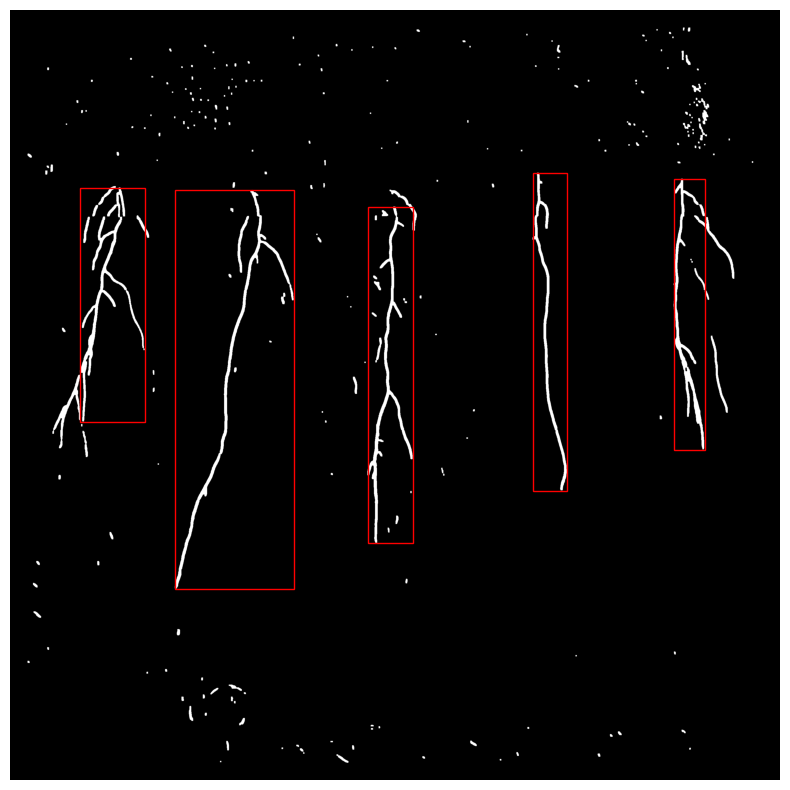

Processing mask 11...
Number of detected objects: 12
Displaying top 5 longest bounding boxes.


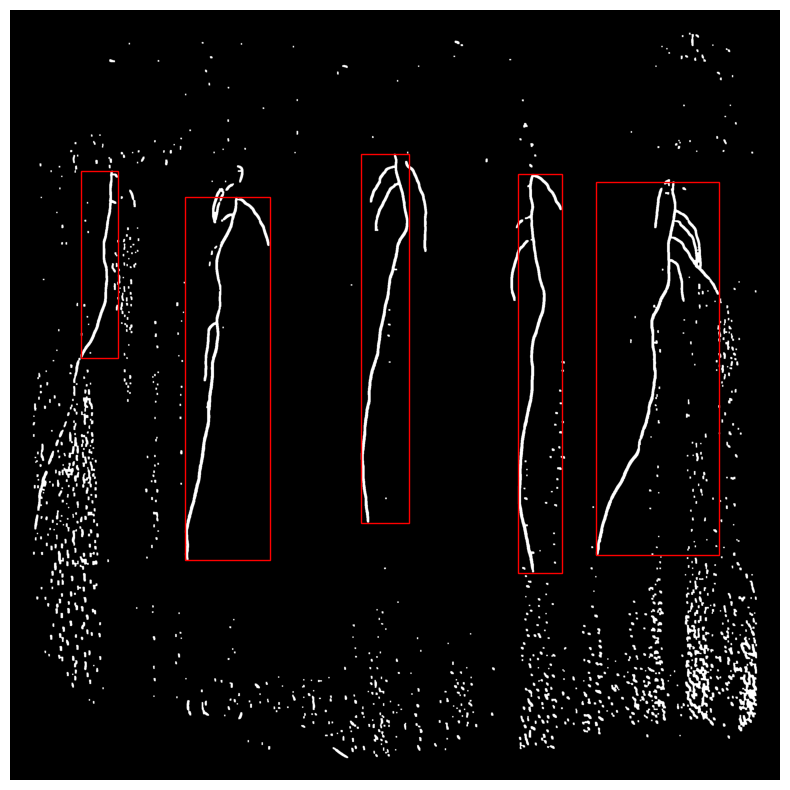

Processing mask 12...
Number of detected objects: 5
Displaying top 5 longest bounding boxes.


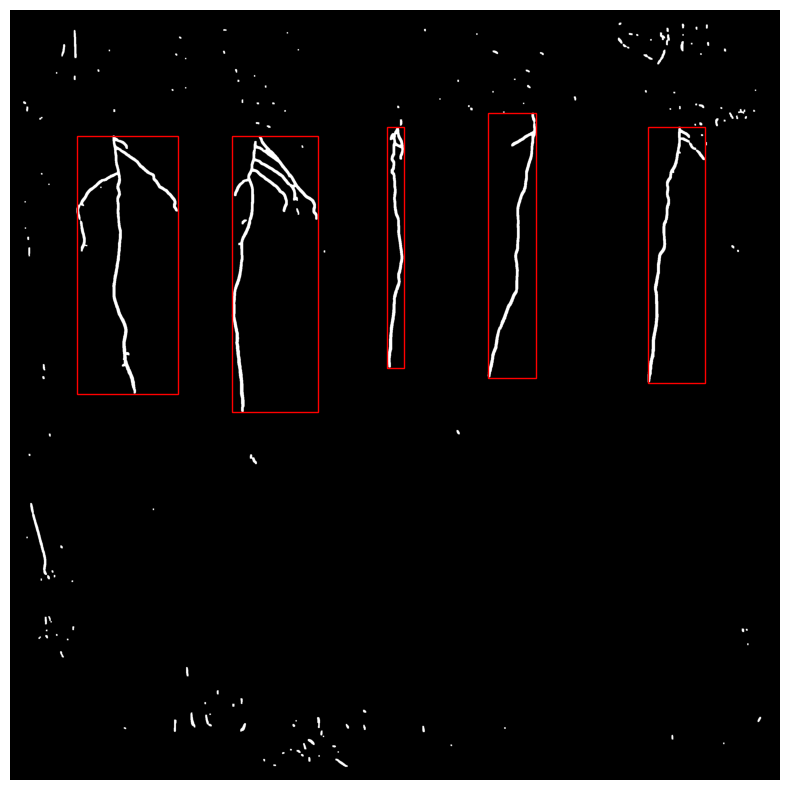

Processing mask 13...
Number of detected objects: 7
Displaying top 5 longest bounding boxes.


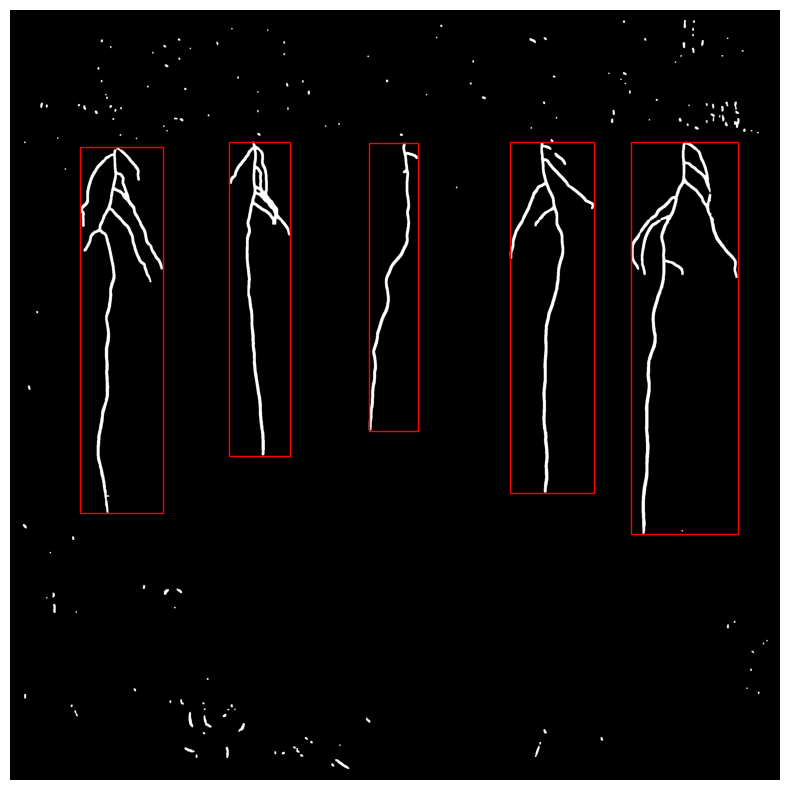

Processing mask 14...
Number of detected objects: 8
Displaying top 5 longest bounding boxes.


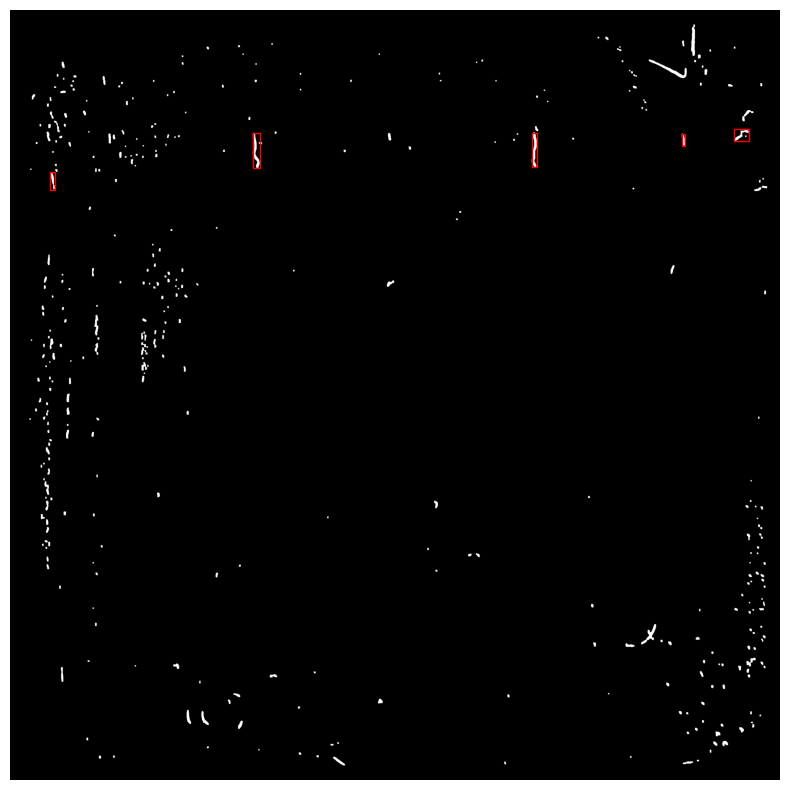

Processing mask 15...
Number of detected objects: 5
Displaying top 5 longest bounding boxes.


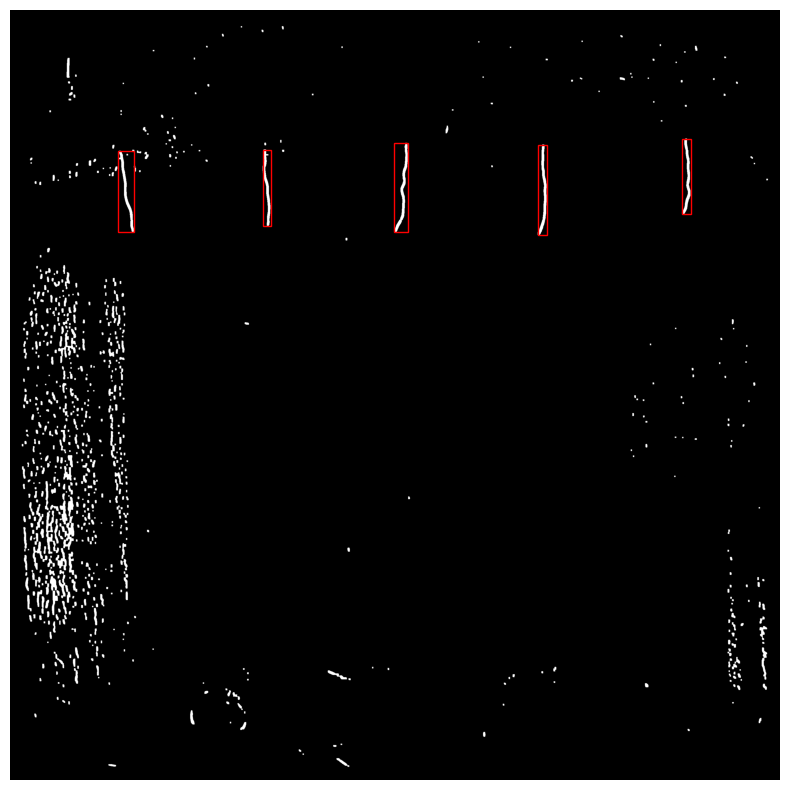

Processing mask 16...
Number of detected objects: 5
Displaying top 5 longest bounding boxes.


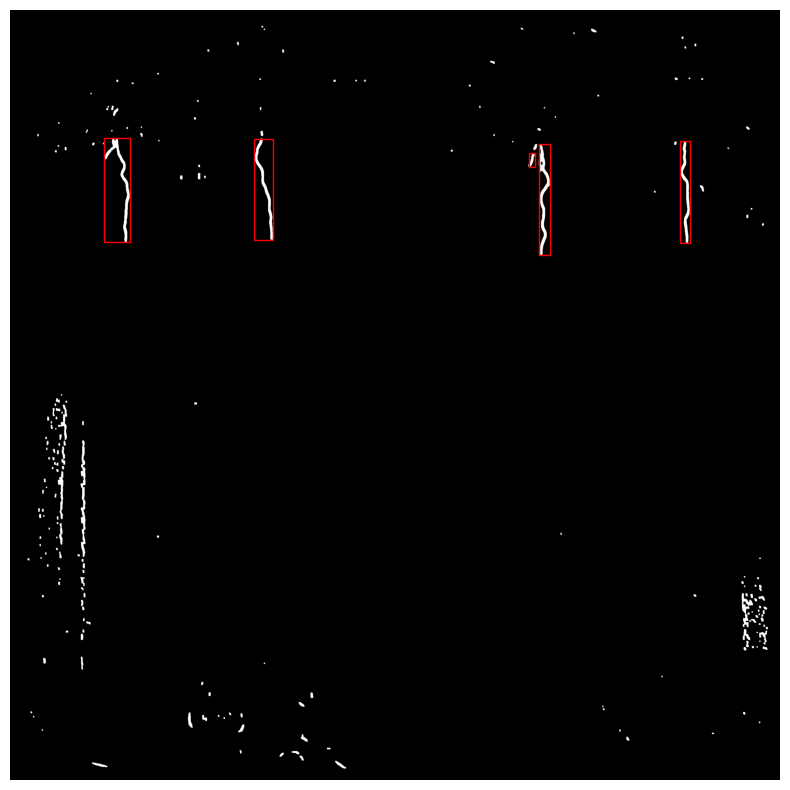

Processing mask 17...
Number of detected objects: 8
Displaying top 5 longest bounding boxes.


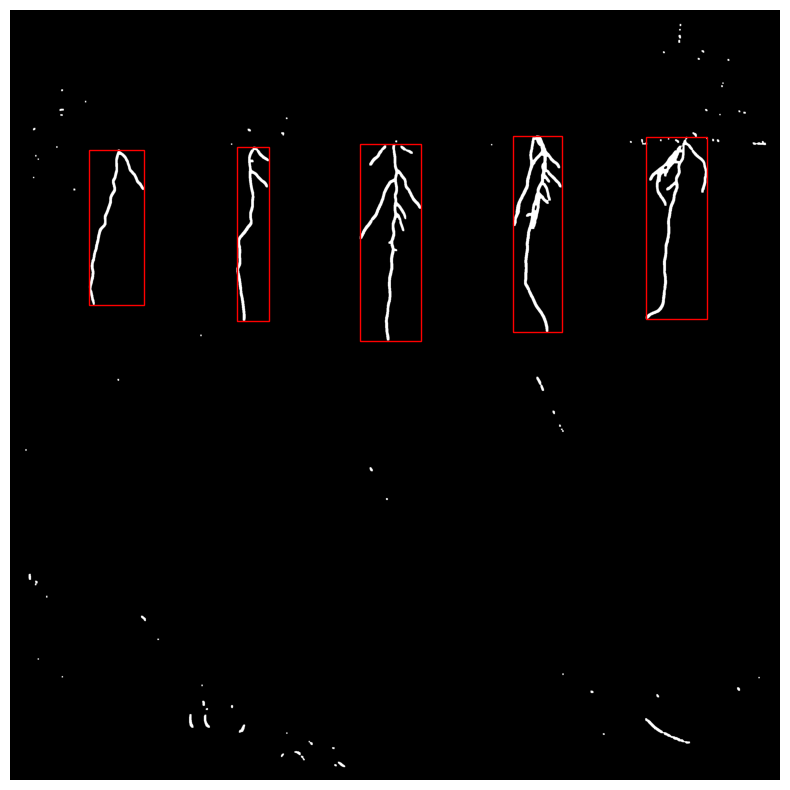

Processing mask 18...
Number of detected objects: 14
Displaying top 5 longest bounding boxes.


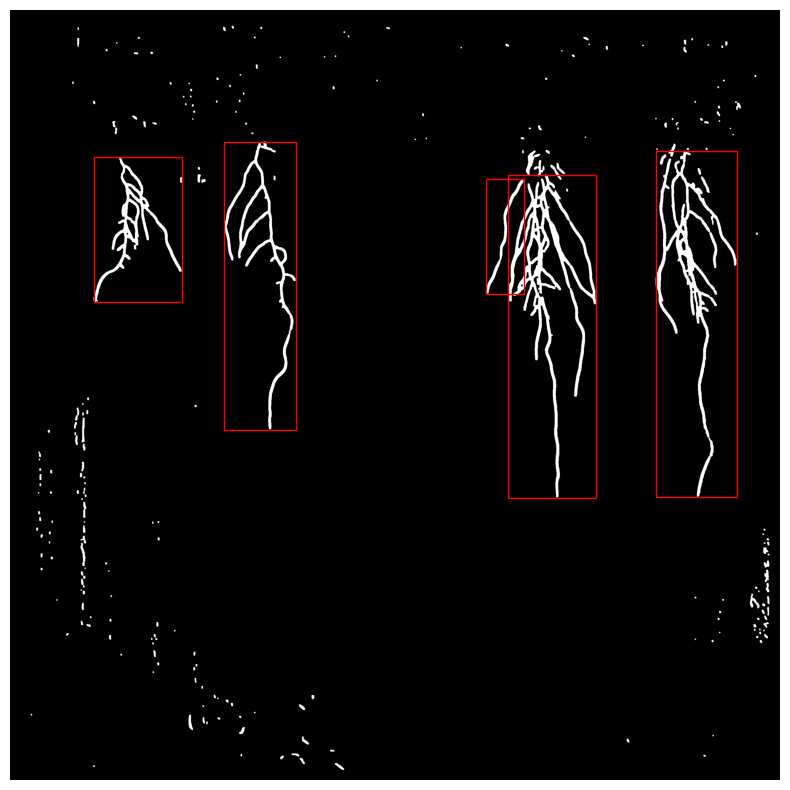

In [ ]:
#training_data_path = r"C:\Users\mstan\OneDrive\Dokumenty\GitHub\2024-25b-fai2-adsai-MonikaStangenberg231648\Y2B_24\masks\train_c"
mask_path = r"C:\Users\mstan\OneDrive\Dokumenty\GitHub\2024-25b-fai2-adsai-MonikaStangenberg231648\datalab_tasks\task5\model4"

#training_images = load_specific_images(training_data_path, suffix="root_mask_trimmed.tif")
#print(f"Number of training images: {len(training_images)}")

masks = load_specific_images(mask_path)  # Load all images from mask_path

for i, mask in enumerate(masks):  
    print(f"Processing mask {i+1}...")

    bboxes = generate_bounding_boxes(mask)
    top_bboxes = get_top_n_bounding_boxes(bboxes, n=5)
    print(f"Number of detected objects: {len(bboxes)}")
    print(f"Displaying top {len(top_bboxes)} longest bounding boxes.")
    plot_bounding_boxes(mask, top_bboxes)


In [1]:
def load_specific_images(folder_path, suffix=None):
    """
    Loads grayscale images from a folder.
    """
    images = []
    for filename in os.listdir(folder_path):
        if suffix is None or filename.endswith(suffix):
            full_path = os.path.join(folder_path, filename)
            image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                images.append((filename, image))
    return images


def generate_bounding_boxes(mask, min_area=230, y_range=(370, 730)):
    """
    Generates bounding boxes based on contours in the mask.
    """
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bboxes = []
    for contour in contours:
        if cv2.contourArea(contour) >= min_area:
            x, y, w, h = cv2.boundingRect(contour)
            if y_range is None or (y_range[0] <= y <= y_range[1]):
                bboxes.append((x, y, w, h))
    return bboxes


def divide_mask_into_regions(mask, n=5):
    """
    Splits the mask into vertical regions.
    """
    height, width = mask.shape
    region_width = width // n
    regions = []
    for i in range(n):
        x_start = i * region_width
        x_end = (i + 1) * region_width if i < n - 1 else width
        regions.append((x_start, 0, x_end - x_start, height))
    return regions


def filter_bboxes_by_region(bboxes, region):
    """
    Filters bounding boxes that overlap with a given region.
    """
    x_region, _, w_region, _ = region
    filtered_bboxes = []
    for x, y, w, h in bboxes:
        if x < x_region + w_region and x + w > x_region:
            filtered_bboxes.append((x, y, w, h))
    return filtered_bboxes


def save_bounding_box_contents(image, bboxes, output_dir, base_filename, region_number):
    """
    Saves bounding box contents as images.
    """
    os.makedirs(output_dir, exist_ok=True)
    bboxes = sorted(bboxes, key=lambda bbox: bbox[0])  # Sort by X-coordinate
    for idx, (x, y, w, h) in enumerate(bboxes):
        cropped = image[y:y+h, x:x+w]
        save_path = os.path.join(output_dir, f"{base_filename}_plant_{region_number}.png")
        cv2.imwrite(save_path, cropped)
        print(f"Saved bounding box content to {save_path}")


def get_top_n_bounding_boxes(bboxes, n=5):
    """
    Returns up to `n` bounding boxes with the largest height.
    """
    sorted_bboxes = sorted(bboxes, key=lambda bbox: bbox[3], reverse=True)
    return sorted_bboxes[:n]


# Paths
mask_path = r"C:\Users\mstan\OneDrive\Dokumenty\GitHub\2024-25b-fai2-adsai-MonikaStangenberg231648\datalab_tasks\task5\model4"
output_path = r"C:\Users\mstan\OneDrive\Dokumenty\GitHub\2024-25b-fai2-adsai-MonikaStangenberg231648\datalab_tasks\task6\model4_saved_bboxes"

os.makedirs(output_path, exist_ok=True)

# Process masks
masks = load_specific_images(mask_path)

for i, (filename, mask) in enumerate(masks):
    print(f"Processing mask {i + 1}/{len(masks)} ({filename})...")
    
    # generating bounding boxes for detected objects
    bboxes = generate_bounding_boxes(mask, min_area=230, y_range=(370, 730))
    
    # selecting 5 largest bounding boxes by height
    top_bboxes = get_top_n_bounding_boxes(bboxes, n=5)
    
    # dividing  mask into 5 regions
    regions = divide_mask_into_regions(mask, n=5)

    for region_idx, region in enumerate(regions, start=1):
        # filtering bounding boxes that overlap
        region_bboxes = filter_bboxes_by_region(top_bboxes, region)
        
        if region_bboxes:
            save_bounding_box_contents(mask, region_bboxes, output_dir=output_path, base_filename=filename, region_number=region_idx)
        else:
            # saving a placeholder if the region has no bounding boxes
            save_path = os.path.join(output_path, f"{filename}_plant_{region_idx}.png")
            with open(save_path, 'w') as f:
                print(f"Empty region {region_idx}, placeholder saved to {save_path}")


Processing mask 1/18 (test_image_01_p.png)...
Saved bounding box content to C:\Users\mstan\OneDrive\Dokumenty\GitHub\2024-25b-fai2-adsai-MonikaStangenberg231648\datalab_tasks\task6\model4_saved_bboxes\test_image_01_p.png_plant_1.png
Region 2: No bounding boxes found.
Empty region 2, placeholder saved to C:\Users\mstan\OneDrive\Dokumenty\GitHub\2024-25b-fai2-adsai-MonikaStangenberg231648\datalab_tasks\task6\model4_saved_bboxes\test_image_01_p.png_plant_2.png
Saved bounding box content to C:\Users\mstan\OneDrive\Dokumenty\GitHub\2024-25b-fai2-adsai-MonikaStangenberg231648\datalab_tasks\task6\model4_saved_bboxes\test_image_01_p.png_plant_3.png
Region 4: No bounding boxes found.
Empty region 4, placeholder saved to C:\Users\mstan\OneDrive\Dokumenty\GitHub\2024-25b-fai2-adsai-MonikaStangenberg231648\datalab_tasks\task6\model4_saved_bboxes\test_image_01_p.png_plant_4.png
Region 5: No bounding boxes found.
Empty region 5, placeholder saved to C:\Users\mstan\OneDrive\Dokumenty\GitHub\2024-25b-